# **DS223 Marketing Analytics | Homework 3 | Survival Analysis**

In [83]:
import lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter, ExponentialFitter

from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter

 ## **Data Preprocessing**

In [13]:
df = pd.read_csv("telco.csv")
df.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


Because there are some categorical variables, it is better if they are transformed into dummy variables:

In [30]:
columns = ['region','marital','ed','gender', 'retire','voice','internet','forward','churn', 'custcat']

data = pd.get_dummies(df,
               columns=columns,
               prefix=columns,
               drop_first=False)
data.head()

,ID,tenure,age,address,income,region_Zone 1,region_Zone 2,region_Zone 3,marital_Married,marital_Unmarried,...,internet_No,internet_Yes,forward_No,forward_Yes,churn_No,churn_Yes,custcat_Basic service,custcat_E-service,custcat_Plus service,custcat_Total service
0,1,13,44,9,64,0,1,0,1,0,...,1,0,0,1,0,1,1,0,0,0
1,2,11,33,7,136,0,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
2,3,68,52,24,116,0,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
3,4,33,33,12,33,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,0
4,5,23,30,9,30,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0


In [16]:
data.columns

Index(['ID', 'tenure', 'age', 'address', 'income', 'region_Zone 1',
       'region_Zone 2', 'region_Zone 3', 'marital_Married',
       'marital_Unmarried', 'ed_College degree',
       'ed_Did not complete high school', 'ed_High school degree',
       'ed_Post-undergraduate degree', 'ed_Some college', 'gender_Female',
       'gender_Male', 'retire_No', 'retire_Yes', 'voice_No', 'voice_Yes',
       'internet_No', 'internet_Yes', 'forward_No', 'forward_Yes', 'churn_No',
       'churn_Yes', 'custcat_Basic service', 'custcat_E-service',
       'custcat_Plus service', 'custcat_Total service'],
      dtype='object')

Because there are several categories belonging to one feature, removing one category will result in more accurate analysis:

In [32]:
data = data[['tenure', 'age', 'address', 'income', 'region_Zone 2', 'region_Zone 3', 'marital_Married', 'ed_Did not complete high school',
             'ed_High school degree', 'ed_Post-undergraduate degree', 'ed_Some college', 'gender_Female', 'retire_Yes', 'voice_Yes',
             'internet_Yes', 'forward_Yes', 'churn_Yes', 'custcat_E-service', 'custcat_Plus service', 'custcat_Total service']]
data.head()

,tenure,age,address,income,region_Zone 2,region_Zone 3,marital_Married,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Female,retire_Yes,voice_Yes,internet_Yes,forward_Yes,churn_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,13,44,9,64,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,11,33,7,136,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1
2,68,52,24,116,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0
3,33,33,12,33,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,23,30,9,30,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0


## **Parametric Models**

In [52]:
exponential_aft = ExponentialFitter()
weibull_aft = WeibullAFTFitter()
lognormal_aft = LogNormalAFTFitter()
loglogistic_aft = LogLogisticAFTFitter()

***Exponential***

In [53]:
exponential_aft.fit(durations = data["tenure"], event_observed = data["churn_Yes"])

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>

***Weibull***

In [54]:
weibull_aft.fit(data, duration_col='tenure', event_col='churn_Yes')

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

***Log-Normal***

In [55]:
lognormal_aft.fit(data, duration_col='tenure', event_col='churn_Yes')

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

***Log-Logistic***

In [56]:
loglogistic_aft.fit(data, duration_col='tenure', event_col='churn_Yes')

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

**Comparing models based on their AIC scores:**

In [57]:
for model in [exponential_aft, weibull_aft, lognormal_aft, loglogistic_aft]:
    print(f'The AIC score of {type(model).__name__} is {model.AIC_}')

The AIC score of ExponentialFitter is 3215.9608134637247
The AIC score of WeibullAFTFitter is 2964.343248102273
The AIC score of LogNormalAFTFitter is 2954.024010194308
The AIC score of LogLogisticAFTFitter is 2956.2079354863868


Based on the AIC scores, it is better to stick with the AFT model with Log-Normal distribution as it has the lowest scores, meaning that it is a better model.

There are also other metrics that could be considered in order to make a decision about which model to choose. For example, likelihood ratio test could be used; by conducting the test on all unique pairs of models, we could decide which distribution is better to use for AFT. Another way is to make predictions with all models and assess their predictive accuracies, and so choose the model which has the most accurate prediction.

**Keeping the significant features:**

Since the chosen model is Log-Normal, let's see its summary to understand what features are significant.

In [60]:
lognormal_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-28 20:14:18 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Female                    -0.05       0.95       0.11            -0.28             0.17                 0.76                 1.19
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Married                   0.46       1.58       0.12             0.23             0.68                 1.26                 1.98
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         1.96       7.09       0.29             1.39             2.53                 4.01                12.54
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005  

The simplest way to understand which features are significant, look at their p-values in the summary; the ones that are less than a chosen significance level (in this case, let's choose alpha=0.05) are significant.

Therefore, keeping the following features from the data, as they have p-values less than 0.05.

In [61]:
data_final = data[['tenure', 'churn_Yes', 'address', 'age', 'custcat_E-service', 'custcat_Plus service', 'custcat_Total service',
                   'internet_Yes', 'marital_Married', 'voice_Yes']]

**Final model:**

In [64]:
model_final = LogNormalAFTFitter()
model_final.fit(data_final, duration_col='tenure', event_col='churn_Yes')
model_final.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-28 21:28:58 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Married         0.45       1.56       0.11             0.22             0.67                 1.25                 1.96
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.09       8.07       0.24             1.62             2.55                 5.06                12.84
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Married           0.00  3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00  8.79 <0.005      59.27
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

## **CLV Analysis**

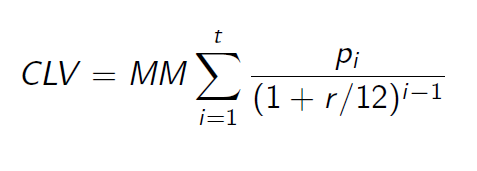

Assumptions: the average monthly margin (MM) is 1300 AMD, the discount rate (r) is 10%.

In [65]:
MM = 1300
r = 0.1

In [77]:
model_pred = model_final.predict_survival_function(data_final).transpose()
model_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999688,0.998129,0.995251,0.991268,0.986401,0.980834,0.974716,0.968167,0.961282,0.954138,...,0.617732,0.613198,0.608719,0.604294,0.599923,0.595604,0.591336,0.587120,0.582953,0.578836
1,0.999736,0.998378,0.995831,0.992267,0.987875,0.982817,0.977229,0.971217,0.964871,0.958261,...,0.634580,0.630109,0.625690,0.621323,0.617006,0.612738,0.608519,0.604349,0.600226,0.596150
2,0.999999,0.999988,0.999956,0.999893,0.999796,0.999659,0.999483,0.999264,0.999004,0.998703,...,0.947949,0.946673,0.945393,0.944108,0.942820,0.941528,0.940233,0.938935,0.937633,0.936329
3,0.997985,0.990704,0.979724,0.966473,0.951861,0.936470,0.920678,0.904738,0.888821,0.873042,...,0.402858,0.398272,0.393771,0.389352,0.385014,0.380754,0.376570,0.372460,0.368423,0.364457
4,0.999870,0.999127,0.997635,0.995447,0.992655,0.989348,0.985607,0.981501,0.977090,0.972423,...,0.702224,0.698099,0.694014,0.689967,0.685958,0.681987,0.678053,0.674157,0.670296,0.666472


In [79]:
sequence = range(1, len(model_pred.columns) + 1)

In [80]:
for num in sequence:
    model_pred.loc[:,num] = model_pred.loc[:,num] / ((1 + r/12)**(sequence[num-1]-1))

In [81]:
model_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999688,0.989880,0.978868,0.966894,0.954195,0.940968,0.927371,0.913527,0.899535,0.885471,...,0.369271,0.363531,0.357893,0.352355,0.346915,0.341571,0.336321,0.331163,0.326096,0.321116
1,0.999736,0.990127,0.979439,0.967868,0.955620,0.942871,0.929761,0.916405,0.902893,0.889297,...,0.379342,0.373556,0.367871,0.362284,0.356793,0.351397,0.346094,0.340881,0.335758,0.330722
2,0.999999,0.991724,0.983496,0.975307,0.967152,0.959028,0.950934,0.942869,0.934834,0.926828,...,0.566669,0.561229,0.555838,0.550495,0.545201,0.539954,0.534755,0.529603,0.524499,0.519440
3,0.997985,0.982516,0.963597,0.942708,0.920783,0.898407,0.875957,0.853677,0.831728,0.810211,...,0.240822,0.236113,0.231515,0.227025,0.222640,0.218357,0.214173,0.210085,0.206091,0.202187
4,0.999870,0.990870,0.981213,0.970970,0.960245,0.949136,0.937733,0.926109,0.914327,0.902439,...,0.419778,0.413864,0.408041,0.402309,0.396666,0.391111,0.385641,0.380256,0.374954,0.369734


In [82]:
model_pred["CLV"] = MM * model_pred.sum(axis = 1)
model_pred.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
0,0.999688,0.989880,0.978868,0.966894,0.954195,0.940968,0.927371,0.913527,0.899535,0.885471,...,0.363531,0.357893,0.352355,0.346915,0.341571,0.336321,0.331163,0.326096,0.321116,56448.832816
1,0.999736,0.990127,0.979439,0.967868,0.955620,0.942871,0.929761,0.916405,0.902893,0.889297,...,0.373556,0.367871,0.362284,0.356793,0.351397,0.346094,0.340881,0.335758,0.330722,57216.985622
2,0.999999,0.991724,0.983496,0.975307,0.967152,0.959028,0.950934,0.942869,0.934834,0.926828,...,0.561229,0.555838,0.550495,0.545201,0.539954,0.534755,0.529603,0.524499,0.519440,69263.247126
3,0.997985,0.982516,0.963597,0.942708,0.920783,0.898407,0.875957,0.853677,0.831728,0.810211,...,0.236113,0.231515,0.227025,0.222640,0.218357,0.214173,0.210085,0.206091,0.202187,45347.948341
4,0.999870,0.990870,0.981213,0.970970,0.960245,0.949136,0.937733,0.926109,0.914327,0.902439,...,0.413864,0.408041,0.402309,0.396666,0.391111,0.385641,0.380256,0.374954,0.369734,60173.770929


Adding the CLV calculations to the original dataset:

In [84]:
df['CLV'] = model_pred.CLV
df.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,56448.832816
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,57216.985622
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,69263.247126
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes,45347.948341
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No,60173.770929


Visualizing the density of CLV for different features and calculating the mean CLV grouped by those features:

*Gender:*

In [89]:
df.groupby("gender")[["CLV"]].mean()

,CLV
gender,
Female,53464.454191
Male,53724.635696


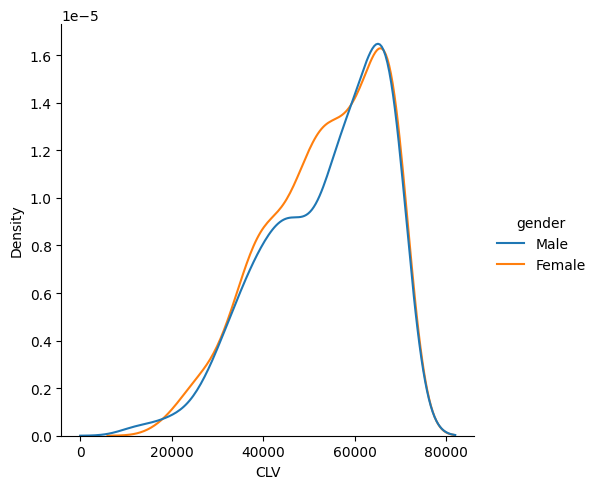

In [87]:
sns.displot(data=df, kind='kde', x='CLV', hue='gender')

*Education:*

In [90]:
df.groupby("ed")[["CLV"]].mean()

,CLV
ed,
College degree,50051.142396
Did not complete high school,58707.536108
High school degree,54812.422493
Post-undergraduate degree,49664.177560
Some college,52118.737786


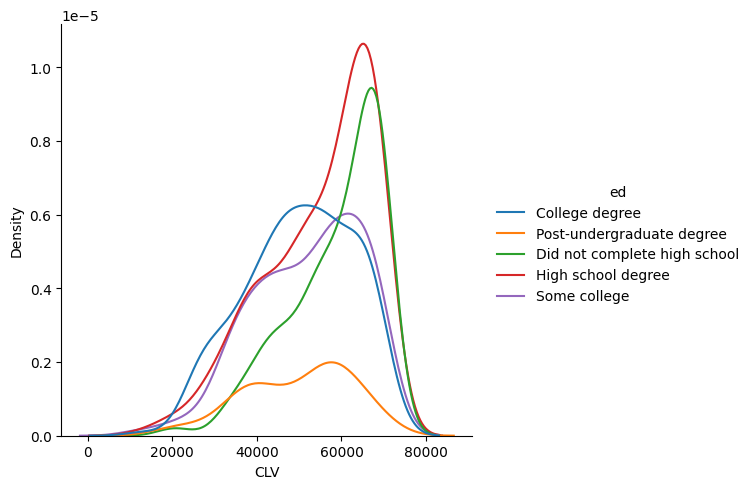

In [91]:
sns.displot(data=df, kind='kde', x='CLV', hue='ed')

*Region:*

In [92]:
df.groupby("region")[["CLV"]].mean()

,CLV
region,
Zone 1,53697.927114
Zone 2,54239.036887
Zone 3,52859.159905


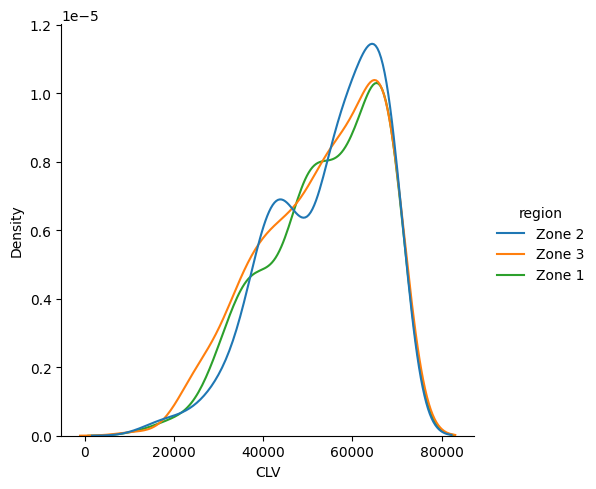

In [93]:
sns.displot(data=df, kind='kde', x='CLV', hue='region')

*Customer category:*

In [95]:
df.groupby("custcat")[["CLV"]].mean()

,CLV
custcat,
Basic service,45347.554193
E-service,57926.607468
Plus service,60787.569171
Total service,50323.269852


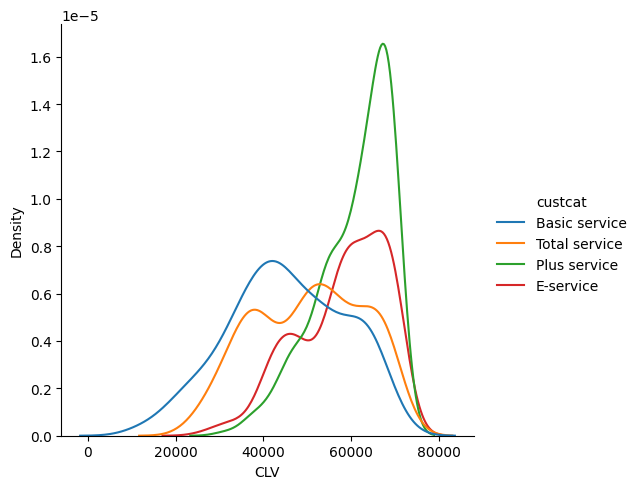

In [94]:
sns.displot(data=df, kind='kde', x='CLV', hue='custcat')

*Marital status:*

In [96]:
df.groupby("marital")[["CLV"]].mean()

,CLV
marital,
Married,56640.333716
Unmarried,50600.310235


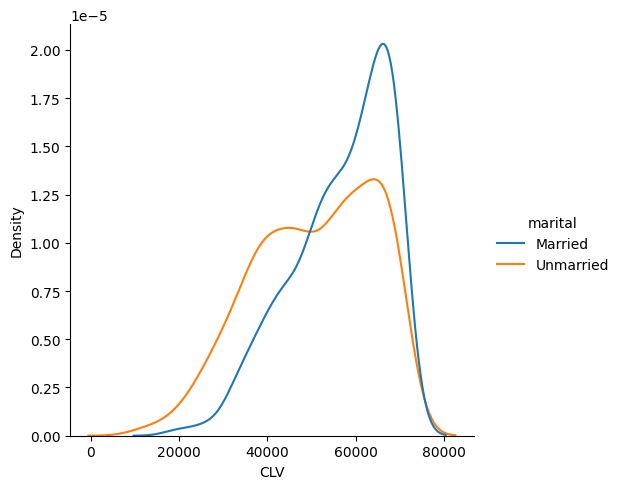

In [97]:
sns.displot(data=df, kind='kde', x='CLV', hue='marital')

*Retired:*

In [99]:
df.groupby("retire")[["CLV"]].mean()

,CLV
retire,
No,52914.797512
Yes,67283.400633


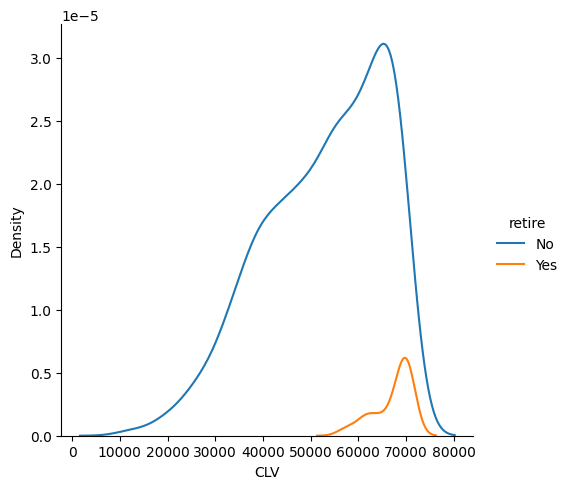

In [100]:
sns.displot(data=df, kind='kde', x='CLV', hue='retire')

*Voice:*

In [101]:
df.groupby("voice")[["CLV"]].mean()

,CLV
voice,
No,55348.137543
Yes,49565.191212


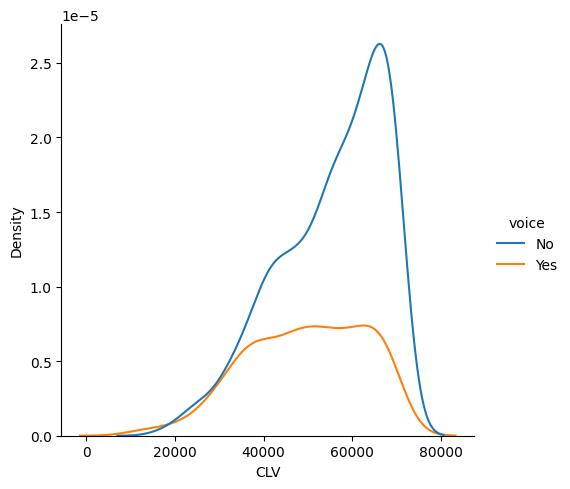

In [102]:
sns.displot(data=df, kind='kde', x='CLV', hue='voice')

*Internet:*

In [104]:
df.groupby("internet")[["CLV"]].mean()

,CLV
internet,
No,58063.122662
Yes,45908.229173


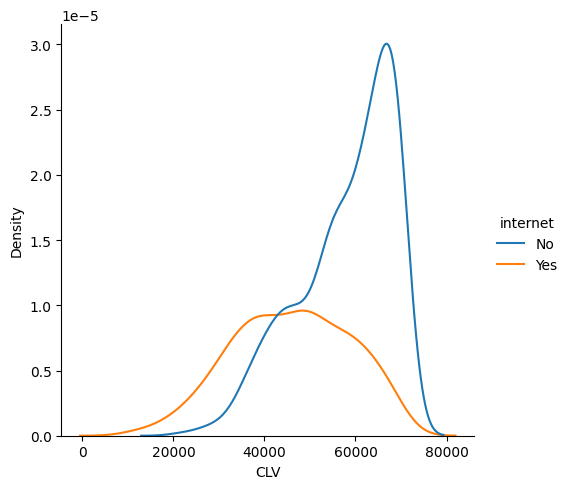

In [103]:
sns.displot(data=df, kind='kde', x='CLV', hue='internet')

## **Findings**

As observed in the above analysis, there are several factors in the telco data that affect the churn risk of customers. By fitting the Accelerated Time Failure (AFT) parametric model with Log-Normal distribution with tenure (time) and churn_Yes as dependent variables, we observe features that are significant in the scope of customer churn; those are 'address' - how many years the customer lived in the same address, 'age', 'custcat' - the category the customer belongs to, and the ones belonging to E-service, Plus service, or Total service specifically, 'internet_Yes' - if the customer has internet availability, 'marital' status affecting especially when the customer is married, 'voice'. The other features that are included in the original data, however, do not play a significant part in customer churn risk.

There are also several features of customers that that indicate higher survival based on their CLV; in general, the customers observed to have higher CLV are not retired people with a high school degree, married and belong to Zone 2, have Plus service, however no internet and voice availability. These are observed by customers' mean and distribution of their CLVs.

To enhance customer retention, one way is to consider targeted strategies for these high-CLV segments, such as personalized offerings or engagement initiatives for long-tenured customers with specific service preferences. Additionally, further investigation into the significance and potential interactions between influential features could provide deeper insights into retention efforts.